# Read observational data from weather mast at Haukeliseter site

Needed for the plot:
- precipitation
- temperature
- wind speed
- wind direction


In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np 
import csv
import pandas as pd
import datetime
from datetime import date
import calendar


%matplotlib inline 

In [2]:
Haukeli = pd.read_csv('../Retrieval/201612.Haukeliseter_SC_copy.txt',\
                    sep = ',',header=0)

In [3]:
dd = Haukeli['Date']
time = Haukeli['TimeStamp']     # Time Stamp
dofe1 = Haukeli['RA1'].astype(float)            # total accumulation from Geonor inside DOUBLE FENCE [mm] RA1
dofe2 = Haukeli['RA2'].astype(float)
dofe3 = Haukeli['RA3'].astype(float)
temp = Haukeli['TA'].astype(float)            # Air temperature, PT100 [deg C] 
speed = Haukeli['FFL4'].astype(float)          # wind speed 4.5m inside DF [m/s]
direction = Haukeli['DDL4'].astype(float)          # wind direction 4.5m inside DF [deg]

In [4]:
dofe1 = dofe1.where(dofe1 != -999.00)
dofe2 = dofe2.where(dofe2 != -999.00)
dofe3 = dofe3.where(dofe3 != -999.00)
temp = temp.where(temp != -999.00)
speed = speed.where(speed != -999.00)
direction = direction.where(direction != -999.00)

In [39]:
# --------- TEMP, WS, WD, ACC every 15 min in  -------------------------------------------------------------------------
idx = np.arange((1440))
t = np.zeros((1440,32))
ws = np.zeros((1440,32))
wd = np.zeros((1440,32))
df1 = np.zeros((1440,32))
df2 = np.zeros((1440,32))
df3 = np.zeros((1440,32))

for i in range(0,31):
    t[:,i] = temp[i*1440:(i+1)*1440]
    ws[:,i] = speed[i*1440 : (i+1)*1440]
    wd[:,i] = direction[i*1440 : (i+1)*1440]
    df1[:,i] = dofe1[i*1440 : (i+1)*1440]
    df2[:,i] = dofe2[i*1440 : (i+1)*1440]
    df3[:,i] = dofe3[i*1440 : (i+1)*1440]
    
min_15 = np.zeros((96,1))
min_60 = np.zeros((24,1))

t_15 = np.zeros((15,96))
t_mean = np.zeros((96,32))

ws_15 = np.zeros((15,96))
ws_mean = np.zeros((96,32))

wd_15 = np.zeros((15,96))
wd_mean = np.zeros((96,32))

df1_60 = np.zeros((60,24))
df1_mean = np.zeros((24,32))

df2_60 = np.zeros((60,24))
df2_mean = np.zeros((24,32))

df3_60 = np.zeros((60,24))
df3_mean = np.zeros((24,32))

for k in range(0,32):
    for i in range(0,96):
        min_15[i,:] = (1/60.)*float(i)
        # Temperature
        t_15[:,i] = (t[i*15:(i+1)*15, k ])     # first day, every 15 min values as column
        t_mean[:,k] = np.mean(t_15,axis=0)   # axis = 0 will return the mean of every single column
        # Wind Speed
        ws_15[:,i] = (ws[i*15:(i+1)*15, k ])
        ws_mean[:,k] = np.mean(ws_15,axis=0)
        # Wind direction
 #       wd_15[:,i] = (wd[i*15:(i+1)*15, k ])
 #       wd_mean[:,k] = np.mean(wd_15,axis=0)
    for i in range(0,24):
        min_60[i,:] = (1/60)*float(i)
        # Double fence 1
        df1_60[:,i] = (df1[i*60:(i+1)*60, k ])
        df1_mean[:,k] = np.mean(df1_15,axis=0)
        # Double fence 2
        df2_60[:,i] = (df2[i*60:(i+1)*60, k ])
        df2_mean[:,k] = np.mean(df2_15,axis=0)
        # Double fence 3
        df3_60[:,i] = (df3[i*60:(i+1)*60, k ])
        df3_mean[:,k] = np.mean(df3_15,axis=0)
        


nan

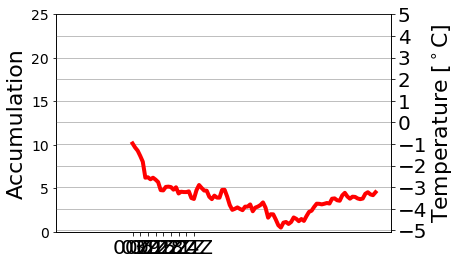

In [42]:
prec_tick = np.arange(0,45,5)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
bar = ax1.bar(min_60, df1_mean[:,23], label='precipitation', color='lightblue')


ax2 = plt.twinx()
line = ax2.plot(min_15, t_mean[:,23],color = 'r',label='20 Dec 2016',linewidth = 4)
ax2.grid(True)

ax1.set_ylabel('Accumulation',fontsize = 22)
ax1.set_yticklabels(prec_tick, fontsize = 14)
ax1.set_xticks(UTC)
ax1.set_xticklabels(timer, fontsize=20)
ax1.set_ylim([0,50])

ax2.set_yticks(T)

ax2.set_ylabel('Temperature [$^\circ$C]',fontsize = 22)
ax2.tick_params(axis='both', which= 'major', labelsize=20)
#ax2.set_xticklabels(timer, fontsize=20)


plt.show()

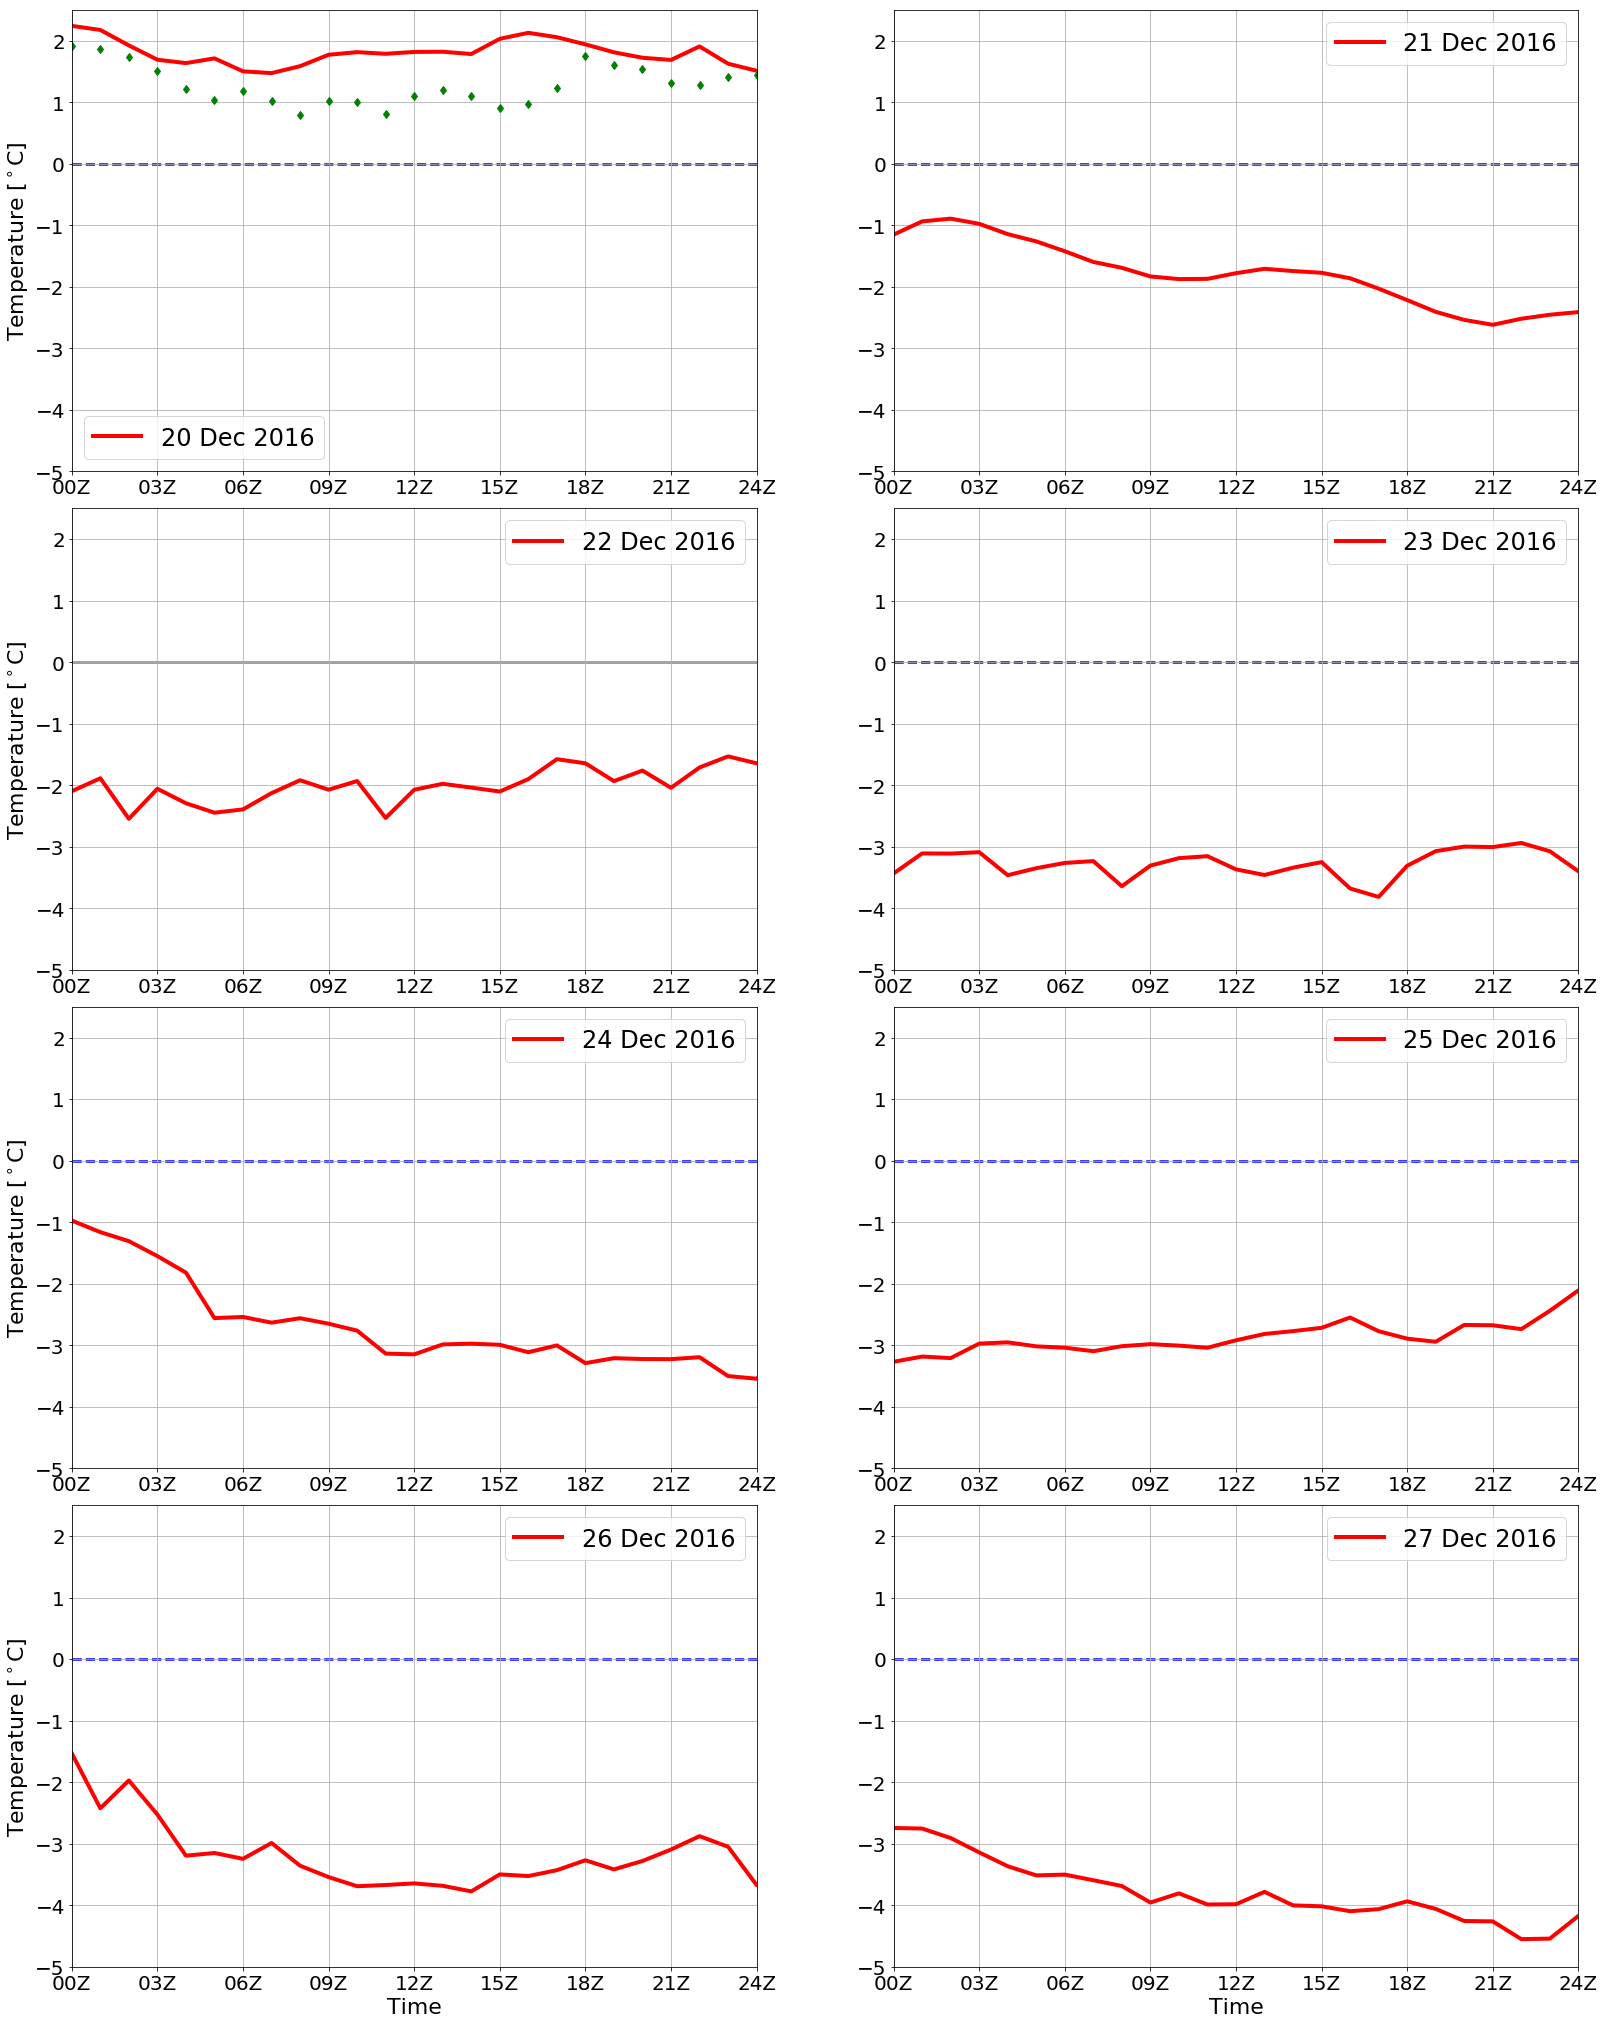

In [40]:
UTC = [1/60*float(0), \
       1/60*float(3), \
       1/60*float(6), \
       1/60*float(9), \
       1/60*float(12), \
       1/60*float(15), \
       1/60*float(18), \
       1/60*float(21), \
       1/60*float(24)]
timer = ['00Z', '03Z','06Z','09Z','12Z','15Z','18Z','21Z','24Z']

T = [-5, -4,-3,-2,-1,0,1,2,3,4,5]

fig = plt.figure(figsize=(27,36))
#ax = fig.add_subplot(1,1,1)

#plt.plot(min_15,t_mean[:,19:])
# row and column sharing
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Four subplots sharing both x/y axes
#f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
#f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, sharex='col', sharey='row',figsize=(20,16))

### 1. Subplot
#ax1 = plt.subplot(4,2,1)
ax1 = fig.add_subplot(4,2,1)
ax1.plot(min_15, t_mean[:,19],color = 'r',label='20 Dec 2016',linewidth = 4)

#bar2 = ax1.bar(min_15,df1_15[:,19], label='Precipitation',color='lightblue')
ax1.legend(loc='best', fontsize=24)
ax1.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')

ax1.set_yticks(T)

ax1.set_ylabel('Temperature [$^\circ$C]',fontsize = 22)
ax1.tick_params(axis='both', which= 'major', labelsize=20)
ax1.set_xticklabels(timer, fontsize=20)



### 2. Subplot
ax2 = fig.add_subplot(4,2,2, sharex=ax1, sharey=ax1)
ax2.plot(min_15, t_mean[:,20],color = 'r',label='21 Dec 2016',linewidth = 4)
ax2.legend(loc='best', fontsize=24)
ax2.tick_params(axis='both', which= 'major', labelsize=20)
ax2.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')



### 3. Subplot
ax3 = fig.add_subplot(4,2,3, sharex=ax1, sharey=ax1)
ax3.plot(min_15, t_mean[:,21],color = 'r',label='22 Dec 2016',linewidth = 4)
ax3.legend(loc='best', fontsize=24)
ax3.set_ylabel('Temperature [$^\circ$C]',fontsize = 22)
ax3.tick_params(axis='both', which= 'major', labelsize=20)
ax3.set_xticklabels(timer, fontsize=20)
ax3.axhline(y = 0., c ='gray', linewidth = 2.5, zorder = 0)#, linestyle = '--')


# make these tick labels invisible
#plt.setp(ax2.get_xticklabels(), visible=False)

### 4. Subplot
ax4 = fig.add_subplot(4,2,4, sharex=ax1, sharey=ax1)
ax4.plot(min_15, t_mean[:,22],color = 'r',label='23 Dec 2016',linewidth = 4)
ax4.legend(loc='best', fontsize=24)
ax4.tick_params(axis='both', which= 'major', labelsize=20)
ax4.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')



### 5. Subplot
ax5 = fig.add_subplot(4,2,5, sharex=ax1, sharey=ax1)
ax5.plot(min_15, t_mean[:,23],color = 'r',label='24 Dec 2016',linewidth = 4)
ax5.legend(loc='best', fontsize=24)
ax5.set_ylabel('Temperature [$^\circ$C]',fontsize = 22)
ax5.tick_params(axis='both', which= 'major', labelsize=20)
ax5.set_xticklabels(timer, fontsize=20)
ax5.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')



### 6. Subplot
ax6 = fig.add_subplot(4,2,6, sharex=ax1, sharey=ax1)
ax6.plot(min_15, t_mean[:,24],color = 'r',label='25 Dec 2016',linewidth = 4)
ax6.legend(loc='best', fontsize=24)
ax6.tick_params(axis='both', which= 'major', labelsize=20)
ax6.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')



### 7. Subplot
ax7 = fig.add_subplot(4,2,7, sharex=ax1, sharey=ax1)
ax7.plot(min_15, t_mean[:,25],color = 'r',label='26 Dec 2016',linewidth = 4)
ax7.legend(loc='best', fontsize=24)
ax7.set_ylabel('Temperature [$^\circ$C]',fontsize = 22)
ax7.tick_params(axis='both', which= 'major', labelsize=20)
ax7.set_xticklabels(timer, fontsize=20)
ax7.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')



### 8. Subplot
ax8 = fig.add_subplot(4,2,8, sharex=ax1, sharey=ax1)
ax8.plot(min_15, t_mean[:,26],color = 'r',label='27 Dec 2016',linewidth = 4)
ax8.legend(loc='best', fontsize=24)
ax8.tick_params(axis='both', which= 'major', labelsize=20)
ax8.axhline(y = 0., c ='b', linewidth = 2.5, zorder = 0, linestyle = '--')




#####
ax1.set_xlim([0,24*1/60])
ax1.set_ylim([-5,2.5])

ax7.set_xticks(UTC),                  ax8.set_xticks(UTC)
ax7.set_xlabel('Time',fontsize = 22), ax8.set_xlabel('Time',fontsize = 22)



ax1.grid(), ax2.grid(), ax3.grid(), ax4.grid()
ax5.grid(), ax6.grid(), ax7.grid(), ax8.grid()




# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.08)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)



plt.show()                    